# Coronavirus

Explore discussions on Twitter about coronavirus.

## Import libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import date

plt.style.use('seaborn')

## Load data

In [235]:
tweets = pd.read_csv('data/tweets_010119_250120.csv', parse_dates=['formatted_date'])

In [237]:
tweets.shape

(321180, 20)

## Process data

In [238]:
# remove columns used in the search
tweets.drop(['key', 'key_group', 'key_mention', 'key_group_mention'], axis=1, inplace=True)

In [239]:
# rename columns
tweets.rename(columns={'date': 'datetime', 'formatted_date': 'formatted_datetime'}, inplace=True)

In [240]:
tweets.head()

,tweet_id,user_id,tweet,datetime,formatted_datetime,retweets,favorites,mentions,hashtags,geo,urls,permalink,username,lang,tweet_length,word_count
0,1220134080932696072,1057027456765452293,The continuing 2019-nCoV epidemic threat of no...,2020-01-23 01:00:08,2020-01-23 01:00:08+00:00,0,0,NaN,#science #research,NaN,https://www.ncbi.nlm.nih.gov/m/pubmed/31953166/,https://twitter.com/researchphilia/status/1220...,researchphilia,es,273,36
1,1220134674887892993,165080514,BREAKING: The Wuhan #coronavirus most likely c...,2020-01-23 01:02:30,2020-01-23 01:02:30+00:00,174,188,NaN,#coronavirus #2019nCoV #WuhanCoronavirus #wuha...,NaN,https://onlinelibrary.wiley.com/doi/abs/10.100...,https://twitter.com/richardvolle/status/122013...,richardvolle,es,219,22
2,1220134704529190913,1102688399570452480,"Lo más correcto sería ponerle "" 2019-nCoV "", y...",2020-01-23 01:02:37,2020-01-23 01:02:37+00:00,0,0,NaN,NaN,NaN,NaN,https://twitter.com/FauReyC/status/12201347045...,FauReyC,es,147,24
3,1220135328050184192,1663541358,No existe vacuna ni tratamiento disponible par...,2020-01-23 01:05:05,2020-01-23 01:05:05+00:00,0,0,NaN,#recomendaciones #coronavirus,NaN,http://ow.ly/2trt50y2pAa,https://twitter.com/QuadratinMexico/status/122...,QuadratinMexico,es,180,25
4,1220135597320409089,223226324,New analysis on @biorxivpreprint from Michael ...,2020-01-23 01:06:10,2020-01-23 01:06:10+00:00,3,6,@biorxivpreprint @NIH,#2019nCoV,NaN,https://www.biorxiv.org/content/10.1101/2020.0...,https://twitter.com/nycbat/status/122013559732...,nycbat,es,176,21


In [241]:
# remove empty rows
tweets.dropna();

In [242]:
tweets.shape

(321180, 16)

In [243]:
# remove duplicates
unique_tweet_ids = tweets.tweet_id.unique()
tweets.drop_duplicates(subset='tweet_id', keep='first', inplace = True) 

In [247]:
assert tweets.shape[0]==len(unique_tweet_ids), 'Drop duplicate operation failed!'

In [248]:
# create a date colum
tweets['date'] = tweets.loc[:,'formatted_datetime'].dt.date

Filter out tweets that are older than 31st December 2019, date of the [first reported case](https://www.who.int/emergencies/diseases/novel-coronavirus-2019) of coronavirus

In [249]:
start_date = date(2019, 12, 31)
start_date = pd.to_datetime(start_date, utc=False)
tweets = tweets[tweets['date'] >= start_date]

In [250]:
tweets.shape

(317399, 17)

---
## Evolution of tweets over time

In [251]:
# group tweets by date
tweets_by_date = tweets.groupby('date', as_index=False).count()

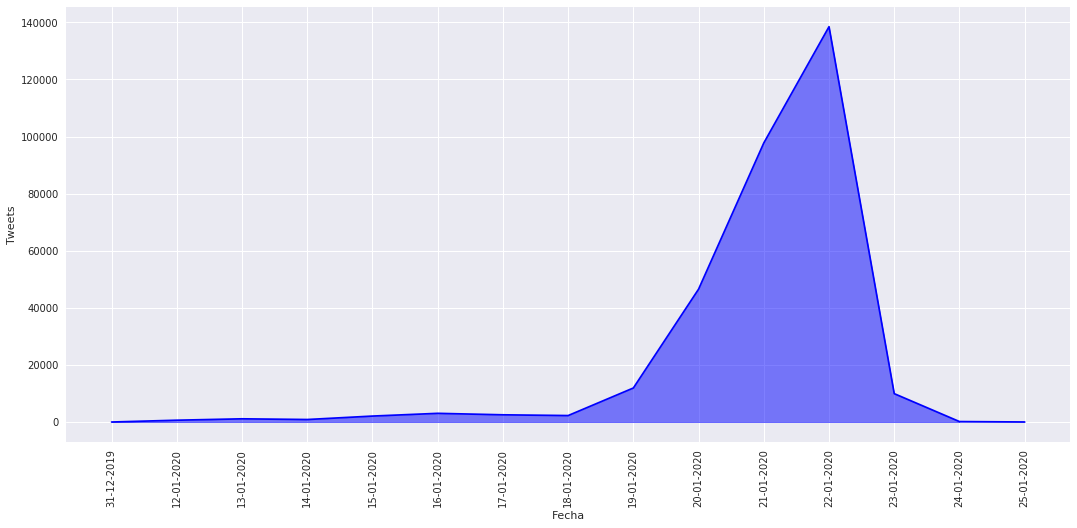

In [286]:
plt.figure(figsize=(18,8))
x_dates = list(pd.to_datetime(tweets_by_date['date']).dt.strftime('%d-%m-%Y'))
y_counts = list(tweets_by_date['tweet_id'])
fig = sns.lineplot(x=x_dates, y=y_counts, color='blue')
fig.set(xlabel='Fecha', ylabel='Tweets')
sns.set_style("dark", {'axes.grid': True})
fig.set_xticklabels(labels=x_dates, rotation=90)
plt.fill_between(x_dates, y_counts, alpha=0.5, color='blue')
plt.show()
#fig.get_figure().savefig("tweets_over_time.png", dpi=200, quality=95, bbox_inches="tight")

Let's explore what happened from 20-01-2020 onwards

In [254]:
start_date = pd.to_datetime(date(2020, 1, 21), utc=False)
end_date = pd.to_datetime(date(2020, 1, 23), utc=False)
tweets_bulk_period = tweets[(tweets['date'] >= start_date) & (tweets['date'] >= start_date)]

In [255]:
tweets_bulk_period.shape

(292911, 17)

In [256]:
print('{}% of all tweets were generated during this period'.format(
      round(100*tweets_bulk_period.shape[0]/tweets.shape[0], 0)))

92.0% of all tweets were generated during this period


In [279]:
# get hour of tweets
tweets_bulk_period['date_hour'] = tweets_bulk_period.loc[:,'formatted_datetime'].dt.strftime('%d-%m-%Y %H')

In [280]:
# group tweets by date and hour
tweets_bulk_period_by_date_hour = tweets_bulk_period.groupby('date_hour').count()

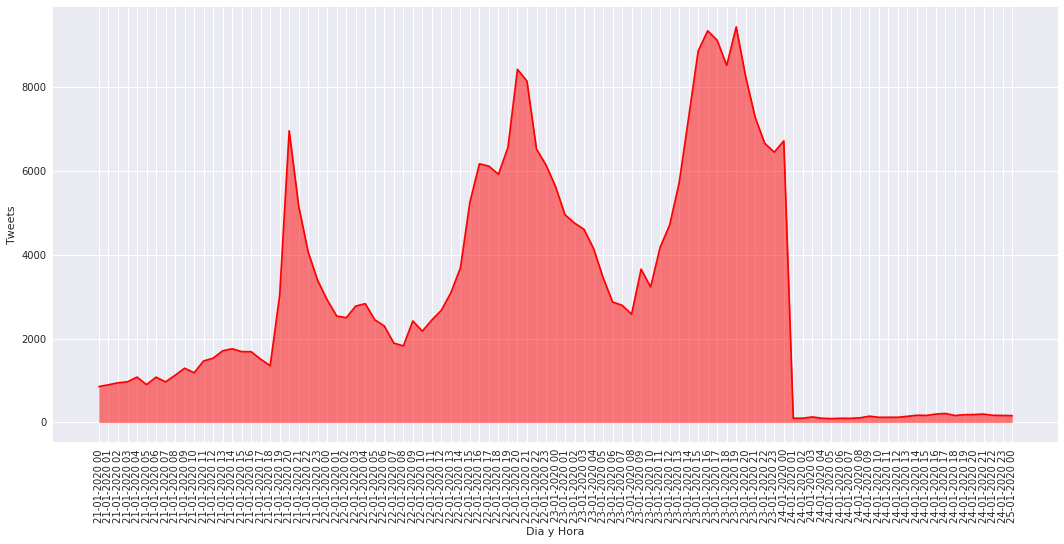

In [285]:
plt.figure(figsize=(18,8))
x_dates = list(tweets_bulk_period_by_date_hour.index)
y_counts = list(tweets_bulk_period_by_date_hour['tweet_id'])
fig = sns.lineplot(x=x_dates, y=y_counts, color='red')
fig.set(xlabel='Dia y Hora', ylabel='Tweets')
sns.set_style('dark', {'axes.grid': True})
fig.set_xticklabels(labels=x_dates, rotation=90)
plt.fill_between(x_dates, y_counts, alpha=0.5, color='red')
plt.show()

---

## Tweet Authors

In [292]:
tweets_by_author = tweets.groupby('username')

In [295]:
total_authors = len(tweets_by_author.groups)

In [297]:
print('There are {0} Twitter users that have posted tweets about coronavirus'.format(total_authors))

There are 172885 Twitter users that have posted tweets about coronavirus


#### Top-50 most active authors

In [300]:
tweets_authors_count = tweets_by_author.count()

In [318]:
active_authors = list(tweets_authors_count.sort_values('tweet_id', ascending=False).head(50)['tweet_id'].index)
active_authors_tweets = list(tweets_authors_count.sort_values('tweet_id', ascending=False).head(50)['tweet_id'])

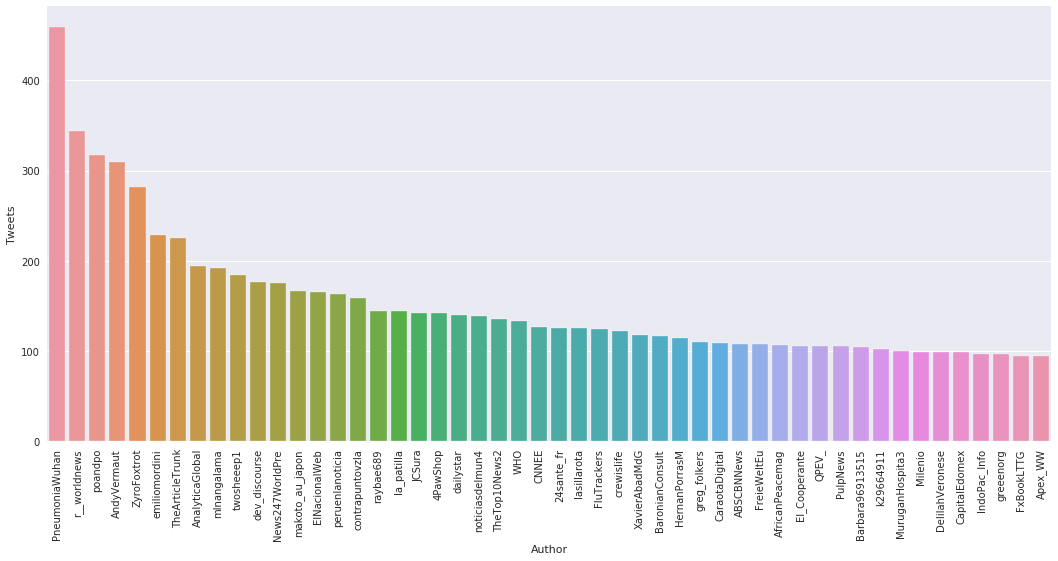

In [320]:
plt.figure(figsize=(18,8))
fig = sns.barplot(x=active_authors, y=active_authors_tweets)
fig.set(xlabel='Author', ylabel='Tweets')
fig.set_xticklabels(labels=active_authors, rotation=90)
plt.show()

---
## Tweets

#### Top-10 most retweeted tweets

In [257]:
tweets.sort_values('retweets', inplace=True, ascending=False)

/home/jorge/Dropbox/Development/bsc/tw_coronovavirus/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
tweets[['date', 'username', 'tweet_id', 'tweet', 'lang' ,'retweets']].head(10)

,date,username,tweet_id,tweet,lang,retweets
85175,2020-01-23,siwuol_,1220259934488547328,rt to save life #coronavirus pic.twitter.com/x...,es,187737
71257,2020-01-23,988Patrick,1220190098878271490,It’s not a joke . Share guys and stay safe #co...,es,95927
131236,2020-01-23,noirisaesthetic,1220378320333766656,มึงงง อันนี้คือข้างถนนเลย คนติดเชื้อ #ไวรัสโคโ...,es,48295
83964,2020-01-23,Naturezlife,1220255527705272320,”ทำไม #coronavirus สามารถแพร่กระจายอย่างรวดเร็...,es,23123
161375,2020-01-23,thelastjaedi,1220430582653640704,please read this and stay safe everyone #Coron...,es,22426
141062,2020-01-23,noirisaesthetic,1220394986836856832,อันนี้วูบล้มกันเห็นๆ เลย เหมือนว่าตอนนี้เหตุกา...,es,16983
8202,2020-01-21,bongtao,1219452062347350018,ตอนนี้ใครมีหน้ากากกันฝุ่น ใส่ตลอดเวลาที่อยู่ใน...,es,16970
26306,2020-01-21,formidableme_,1219655559302934529,SO ANG TRUE REASON SA BREAK-UP NG JADINE AY No...,es,15013
53260,2020-01-22,not_irvin,1219766920641052672,Kailan kaya mas magiging affected ang mga Fili...,es,11900
66994,2020-01-23,LamYikFei,1220174573338906624,Hong Kong’s first Wuhan coronavirus patient. 2...,es,11487


#### Most retweeted tweet

In [265]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [267]:
tweet_html = ("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">rt to save life <a href="https://twitter.com/hashtag/coronavirus?src=hash&amp;ref_src=twsrc%5Etfw">#coronavirus</a> <a href="https://t.co/xQ8z2ihrAu">pic.twitter.com/xQ8z2ihrAu</a></p>&mdash; siwuol 🐈 (@siwuol_) <a href="https://twitter.com/siwuol_/status/1220259934488547328?ref_src=twsrc%5Etfw">January 23, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(tweet_html)